In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
df=pd.read_csv('C:/data_science/gridcomputing/Modified_dataset_20001.csv')

In [3]:
df=df.drop(['PartitionID','ReqNProcs'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2,random_state = 0)
Y=np.array(df['WaitTime'])
X=df.drop('WaitTime',axis=1)

In [5]:
train.shape,test.shape

((16000, 16), (4001, 16))

In [6]:
train_y=np.array(train['WaitTime'])
train_x=train.drop('WaitTime',axis=1)
test_y=np.array(test['WaitTime'])
test_x=test.drop('WaitTime',axis=1)

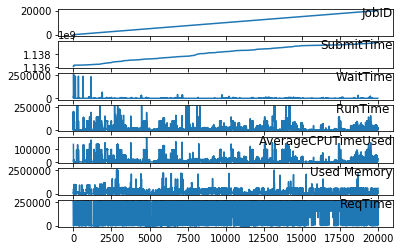

In [7]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [8]:
train_x = np.array(train_x).reshape((train_x.shape[0],15,1))
test_x = np.array(test_x).reshape((test_x.shape[0],15,1))
X = np.array(X).reshape((X.shape[0],15,1))

In [18]:
EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]


In [9]:
def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))

In [10]:

def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))

In [11]:
def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))

def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))

In [12]:
def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))

In [13]:
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

Using TensorFlow backend.


Train on 16000 samples, validate on 4001 samples
Epoch 1/50
 - 7s - loss: 8083.8407 - val_loss: 6750.7475
Epoch 2/50
 - 6s - loss: 8082.8387 - val_loss: 6749.9359
Epoch 3/50
 - 6s - loss: 8082.1447 - val_loss: 6749.2494
Epoch 4/50
 - 5s - loss: 8081.5610 - val_loss: 6748.6689
Epoch 5/50
 - 6s - loss: 8081.0608 - val_loss: 6748.1672
Epoch 6/50
 - 6s - loss: 8080.6275 - val_loss: 6747.7294
Epoch 7/50
 - 6s - loss: 8080.3457 - val_loss: 6747.5680
Epoch 8/50
 - 6s - loss: 8080.2887 - val_loss: 6747.5509
Epoch 9/50
 - 6s - loss: 8080.2863 - val_loss: 6747.5497
Epoch 10/50
 - 6s - loss: 8080.2837 - val_loss: 6747.5494
Epoch 11/50
 - 6s - loss: 8080.2833 - val_loss: 6747.5490
Epoch 12/50
 - 6s - loss: 8080.2826 - val_loss: 6747.5492
Epoch 13/50
 - 6s - loss: 8080.2833 - val_loss: 6747.5475
Epoch 14/50
 - 6s - loss: 8080.2835 - val_loss: 6747.5474
Epoch 15/50
 - 6s - loss: 8080.2838 - val_loss: 6747.5469
Epoch 16/50
 - 6s - loss: 8080.2814 - val_loss: 6747.5473
Epoch 17/50
 - 6s - loss: 8080.2

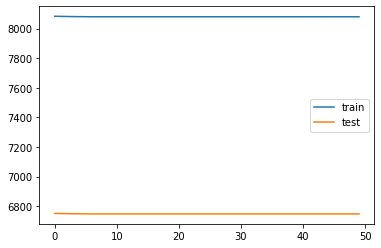

In [14]:
history = model.fit(train_x, train_y, epochs=50, batch_size=72, validation_data=(test_x, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [16]:
pred = model.predict(test_x)
prediction =model.predict(X)

In [19]:
smape(test_y,pred)

1.0277592906065016

In [20]:
mae(test_y,pred)

6753.663211063787

In [21]:
rmse(test_y,pred)

48912.59092438746

In [22]:
mase(test_y,pred)

0.5341802506555661